In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import MissingIndicator
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("heloc_dataset_v1.csv")
for i in range(10459):    
    if df['RiskPerformance'][i] == 'Bad':
        df['RiskPerformance'][i] = 1
    else:
        df['RiskPerformance'][i] = 0
Y_train = df['RiskPerformance'].astype('int')
df.head()

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,1,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,1,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,1,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,1,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,1,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


In [3]:
df.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,4.928291,...,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,3.756275,...,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,4.000000,...,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,6.000000,...,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,7.000000,...,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

In [5]:
print((df['RiskPerformance']==1).sum())
print((df['RiskPerformance']==0).sum())

5459
5000


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


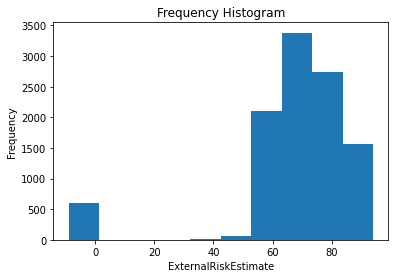

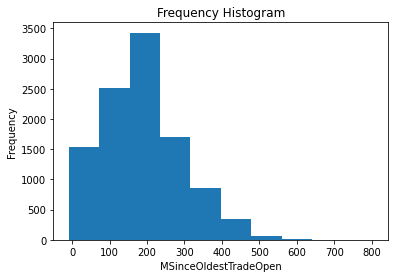

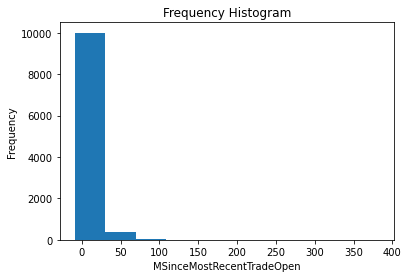

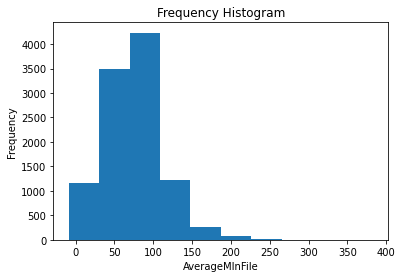

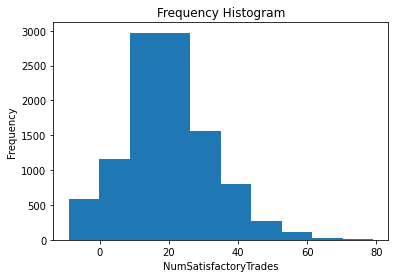

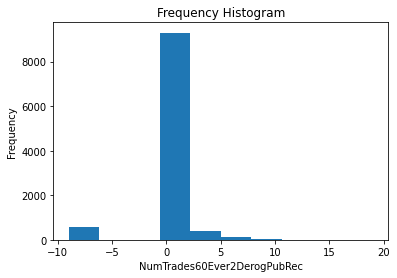

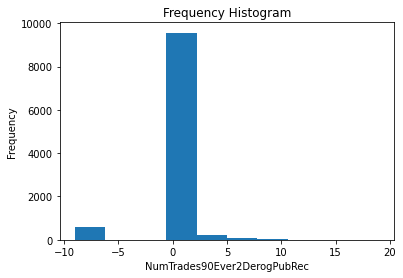

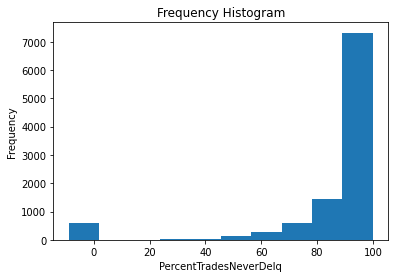

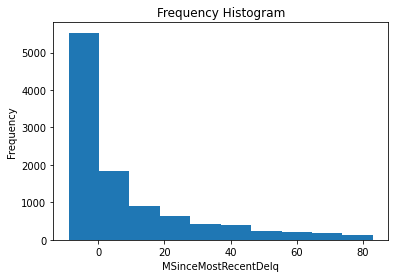

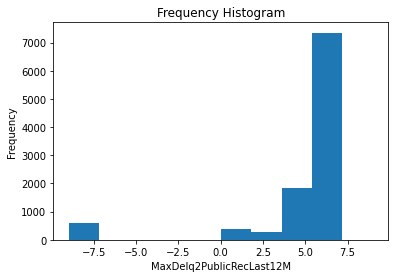

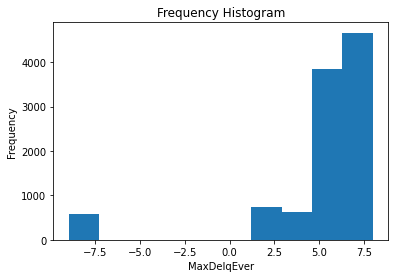

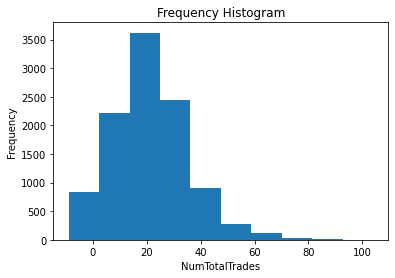

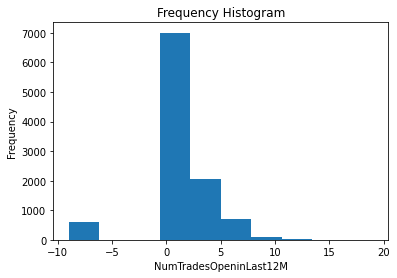

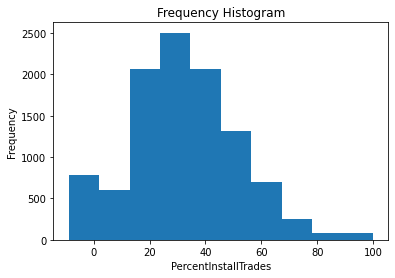

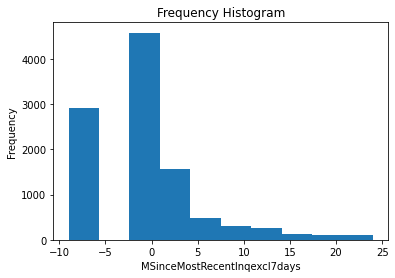

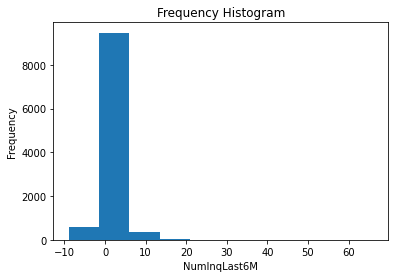

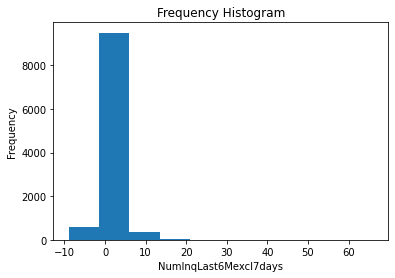

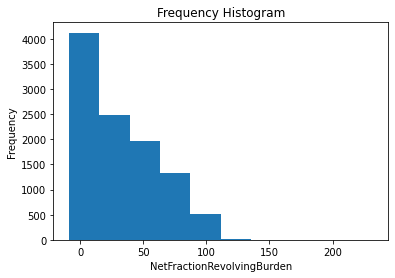

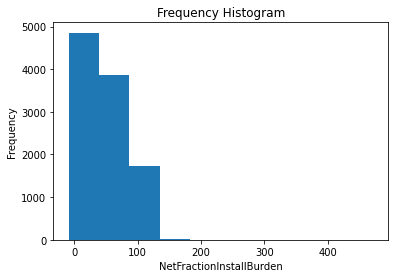

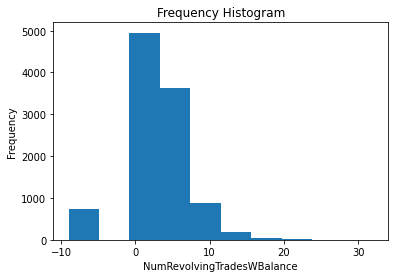

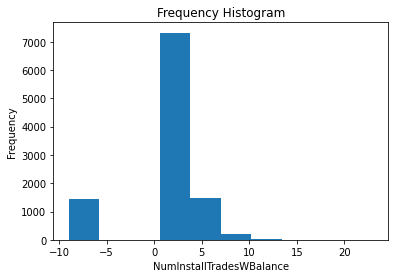

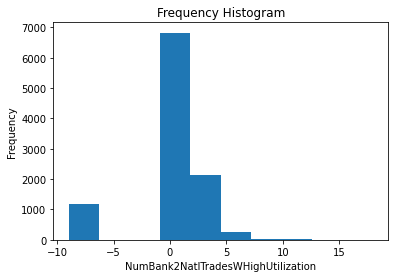

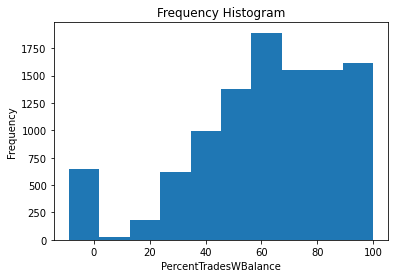

In [6]:
# Plot Histogram on x

for i in range(23):
    fig1, ax1 = plt.subplots()
    ax1.hist(df.iloc[:,i+1])
    ax1.set(title='Frequency Histogram',xlabel=df.columns[i+1], ylabel='Frequency')

In [7]:
miss=(df["MSinceOldestTradeOpen"]<0).sum()
miss2=(df['MSinceMostRecentTradeOpen']<0).sum()

print("%d missings in MSinceOldestTradeOpen"%miss)
print("%d missings in MSinceMostRecentTradeOpen"%miss2)

827 missings in MSinceOldestTradeOpen
588 missings in MSinceMostRecentTradeOpen


In [8]:
#to match  'MaxDelqEver' to   ' MaxDelq2PublicRecLast12M ' 

for i in range(10459):
    if df['MaxDelqEver'][i] <0: df['MaxDelqEver'][i] =df['MaxDelqEver'][i]
    else: df['MaxDelqEver'][i]= df['MaxDelqEver'][i]-2
        


pipe = Pipeline([ 
                 ("replace 6 with 5", SimpleImputer(missing_values= 6, strategy='constant', fill_value= 5)),
                 ("replace 7 with 6", SimpleImputer(missing_values= 7, strategy='constant', fill_value= 6)),
                 ("replace 8 and with 7 ", SimpleImputer(missing_values= 8, strategy='constant', fill_value= 7)),
                 ("replace  9 with 7 ", SimpleImputer(missing_values= 9, strategy='constant', fill_value= 7))  ])

df['MaxDelq2PublicRecLast12M'] = pipe.fit_transform(pd.DataFrame(df['MaxDelq2PublicRecLast12M'].astype(int)))






/usr/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [9]:
#check if numbers conver right
df['MaxDelqEver'].unique()

array([ 3,  6,  4,  2,  0, -9,  1,  5])

In [10]:
df['MaxDelq2PublicRecLast12M'].unique()

array([ 3,  0,  6,  5,  4, -9,  7,  1,  2])

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


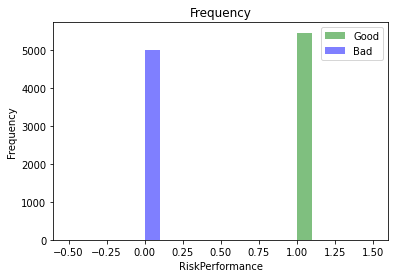

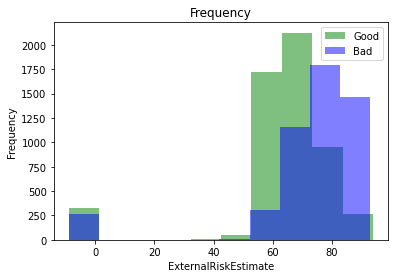

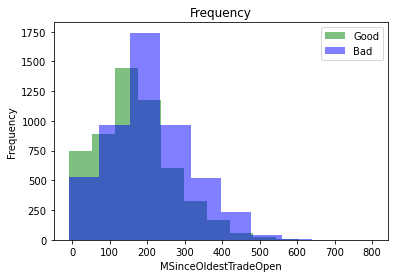

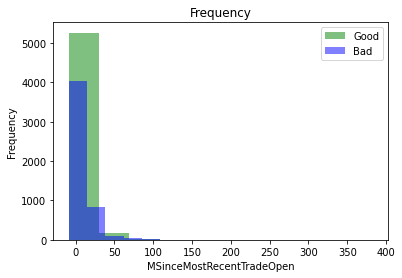

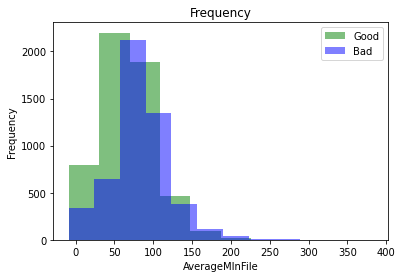

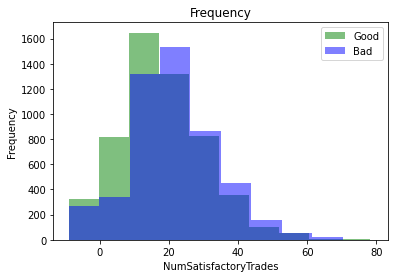

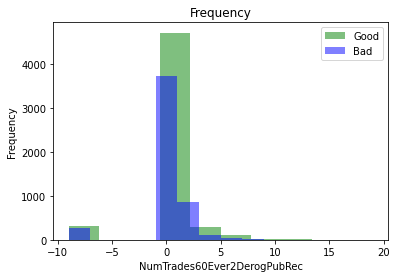

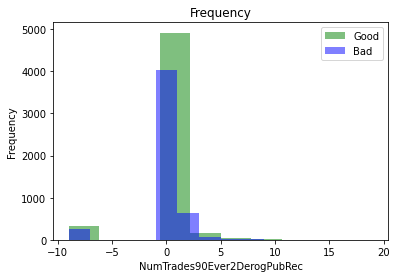

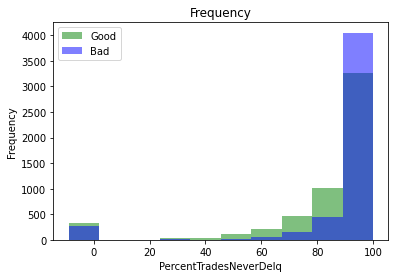

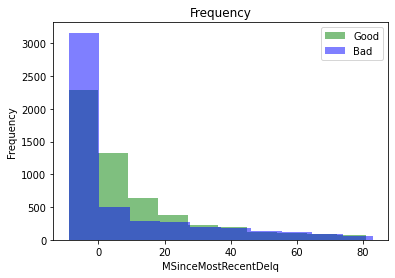

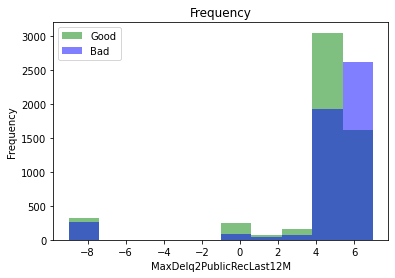

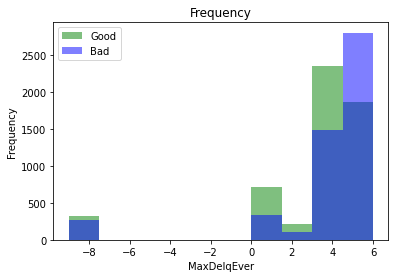

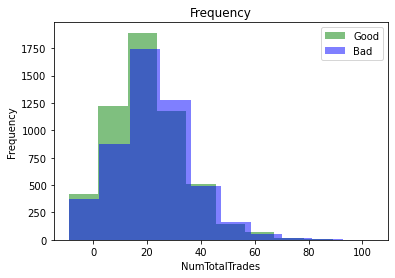

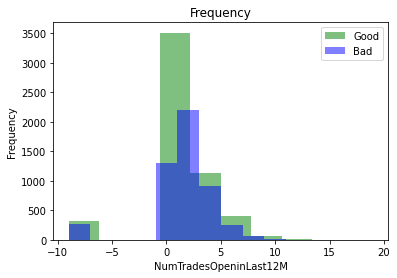

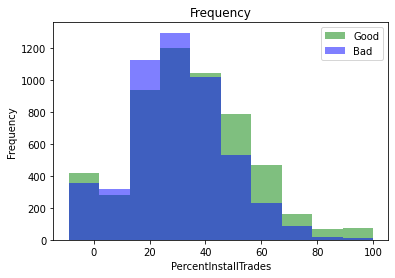

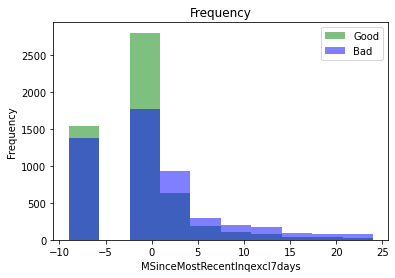

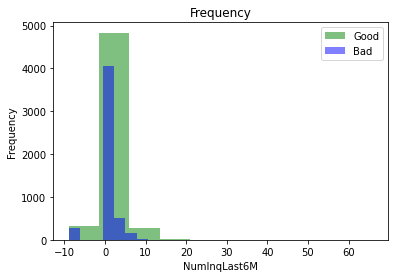

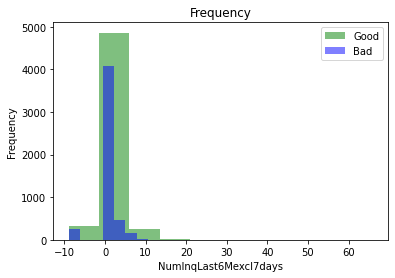

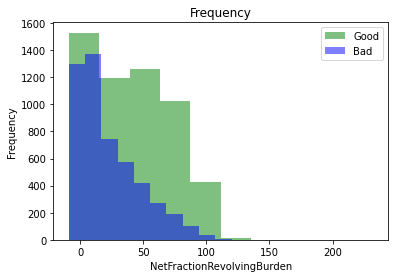

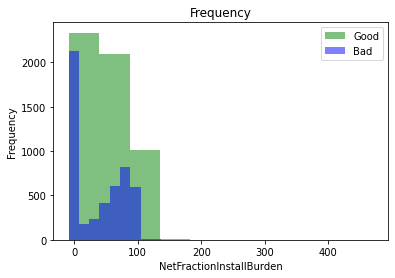

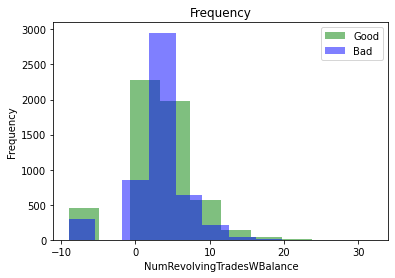

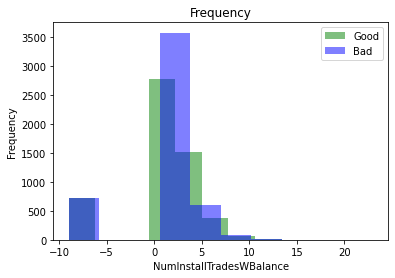

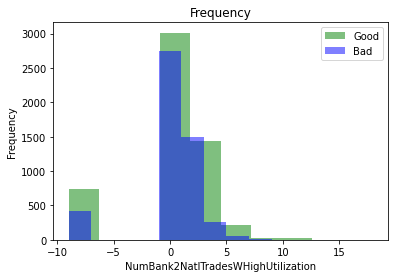

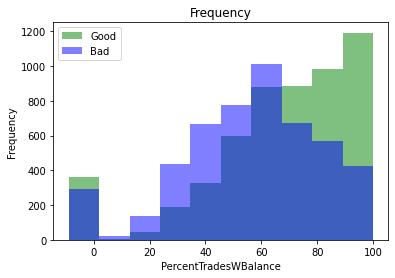

In [11]:
x1 = df.loc[df.RiskPerformance==1, :]
x2 = df.loc[df.RiskPerformance==0, :]

for i in range(len(df.columns)):
    fig1, ax1 = plt.subplots()
    
    ax1.hist(x1.iloc[:,i], alpha=0.5, color='g', label='Good')
    ax1.hist(x2.iloc[:,i], alpha=0.5, color='b', label='Bad')

    ax1.set(title='Frequency',xlabel= df.columns[i] ,ylabel='Frequency')
    ax1.legend()

In [12]:
#change -7 -8 -9 to each column's mean
do_nothing_imputer = ColumnTransformer([("Imputer -7 to mean", SimpleImputer(missing_values=-7, strategy='mean'), [])], remainder='passthrough')

feature_expansion = FeatureUnion([("do nothing", do_nothing_imputer),
                                  ("add features for -7", MissingIndicator(missing_values=-7, features='missing-only',error_on_new=False)),
                                  ("add features for -8", MissingIndicator(missing_values=-8, features='missing-only',error_on_new=False)),
                                  ("add features for -9", MissingIndicator(missing_values=-9, features='missing-only',error_on_new=False))
                                 ])


pipeline = Pipeline([("expand features", feature_expansion), 
                 ("replace -7 with -8", SimpleImputer(missing_values=-7, strategy='constant', fill_value=-8)),
                 ("replace -8 with -9", SimpleImputer(missing_values=-8, strategy='constant', fill_value = -9)),
                 ("replace -9 with mean", SimpleImputer(missing_values=-9, strategy='mean'))   
                    ])




# x train set


In [13]:
# expand features
X_train = df.iloc[:,1:]
pre_model = pipeline.fit(X_train)
X_train_t = pre_model.transform(X_train)


minus_7_indicator_transformer = MissingIndicator(missing_values=-7, features='missing-only').fit(X_train)
minus_8_indicator_transformer = MissingIndicator(missing_values=-8, features='missing-only').fit(X_train)
minus_9_indicator_transformer = MissingIndicator(missing_values=-9, features='missing-only').fit(X_train)


col_names_minus_7 = X_train.columns.values[minus_7_indicator_transformer.features_].tolist() 
col_names_minus_7 = list(map(lambda s:str(s)+'=-7',col_names_minus_7)) 
col_names_minus_8 = X_train.columns.values[minus_8_indicator_transformer.features_].tolist() 
col_names_minus_8 = list(map(lambda s:str(s)+'=-8',col_names_minus_8))
col_names_minus_9 = X_train.columns.values[minus_9_indicator_transformer.features_].tolist() 
col_names_minus_9 = list(map(lambda s:str(s)+'=-9',col_names_minus_9))

columns_all = X_train.columns.values.tolist() + col_names_minus_7 + col_names_minus_8 + col_names_minus_9


X_train_t = pd.DataFrame(X_train_t, columns=columns_all)

X_train_t = X_train_t.astype(int)

In [14]:
X_train_t

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades=-9,MSinceMostRecentInqexcl7days=-9,NumInqLast6M=-9,NumInqLast6Mexcl7days=-9,NetFractionRevolvingBurden=-9,NetFractionInstallBurden=-9,NumRevolvingTradesWBalance=-9,NumInstallTradesWBalance=-9,NumBank2NatlTradesWHighUtilization=-9,PercentTradesWBalance=-9
0,55,144,4,84,20,3,0,83,2,3,...,0,0,0,0,0,0,0,0,0,0
1,61,58,15,41,2,4,4,100,21,0,...,0,0,0,0,0,0,0,0,0,0
2,67,66,5,24,9,0,0,100,21,6,...,0,0,0,0,0,0,0,0,0,0
3,66,169,1,73,28,1,1,93,76,5,...,0,0,0,0,0,0,0,0,0,0
4,81,333,27,132,12,0,0,100,21,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,73,131,5,57,21,0,0,95,80,5,...,0,0,0,0,0,0,0,0,0,0
10455,65,147,39,68,11,0,0,92,28,5,...,0,0,0,0,0,0,0,0,0,0
10456,74,129,6,64,18,1,1,100,21,5,...,0,0,0,0,0,0,0,0,0,0
10457,72,234,12,113,42,2,2,96,35,5,...,0,0,0,0,0,0,0,0,0,0


In [15]:
def dummy(df,le=7,text='MaxDelqEver'):
    ls=[]
    for i in range(le):
        ls.append("%s = %d" %(text,i))
    table = pd.get_dummies(df[text])
    table.columns = ls
    return(table)


In [16]:
MaxDelqEver_table=dummy(X_train_t,text= 'MaxDelqEver')
MaxDelqEver_table.head()

,MaxDelqEver = 0,MaxDelqEver = 1,MaxDelqEver = 2,MaxDelqEver = 3,MaxDelqEver = 4,MaxDelqEver = 5,MaxDelqEver = 6
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1


In [17]:
MaxDelq2PublicRecLast12M_table=dummy(X_train_t,le=8,text= 'MaxDelq2PublicRecLast12M')
MaxDelq2PublicRecLast12M_table.head()

,MaxDelq2PublicRecLast12M = 0,MaxDelq2PublicRecLast12M = 1,MaxDelq2PublicRecLast12M = 2,MaxDelq2PublicRecLast12M = 3,MaxDelq2PublicRecLast12M = 4,MaxDelq2PublicRecLast12M = 5,MaxDelq2PublicRecLast12M = 6,MaxDelq2PublicRecLast12M = 7
0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0


In [18]:
X_train_t = pd.concat([X_train_t,MaxDelq2PublicRecLast12M_table,MaxDelqEver_table],axis=1)


# Export Preprocessing element

In [19]:
list_of_data=[]
list_of_data.append(pre_model)
list_of_data.append(columns_all)


In [20]:
import pickle
filename = 'preprocessing.sav'
with open(filename,'wb') as fp:
    pickle.dump(list_of_data,fp)

# Data exploration for cleaned data

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


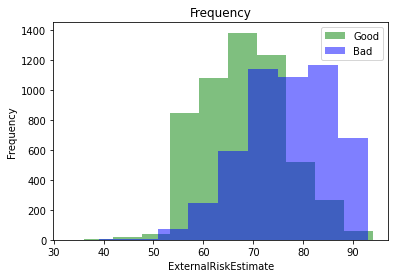

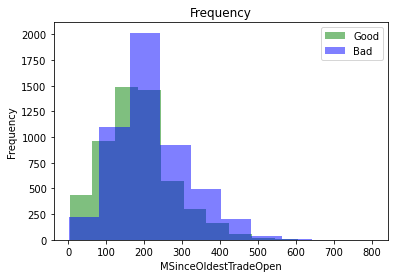

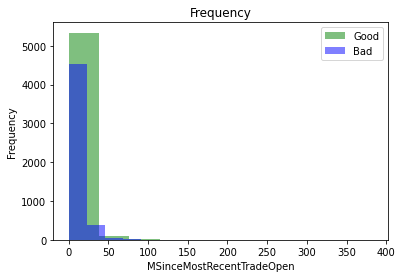

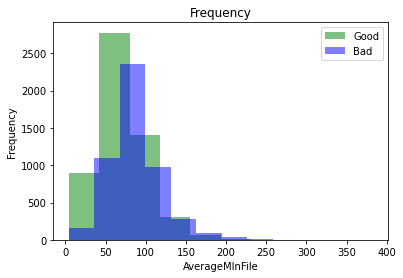

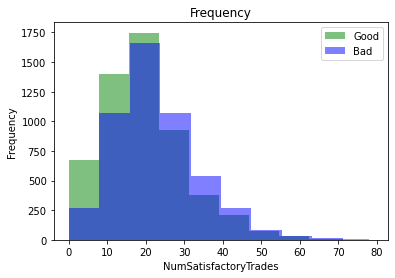

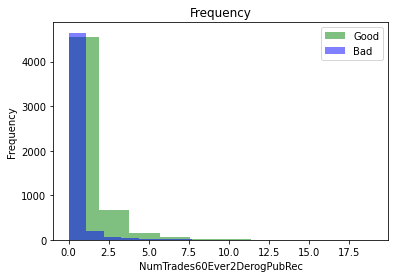

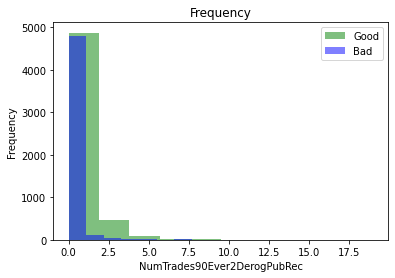

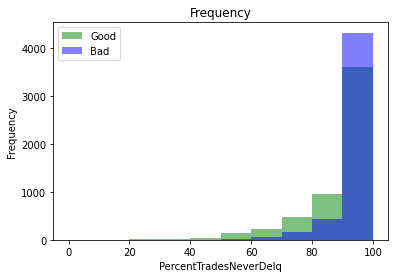

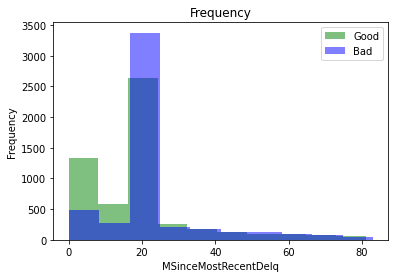

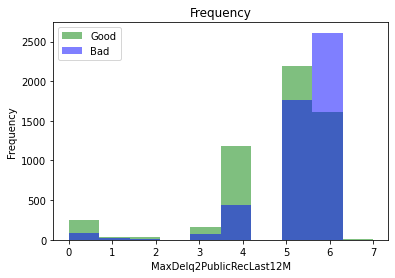

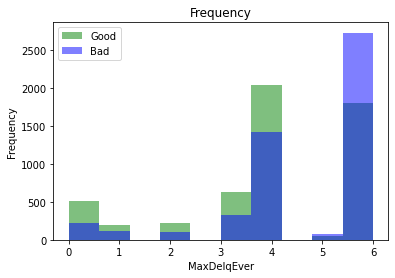

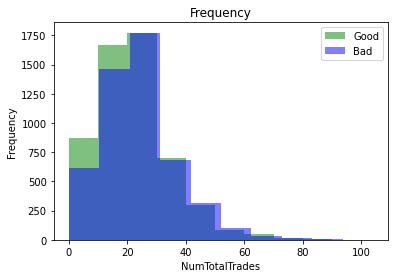

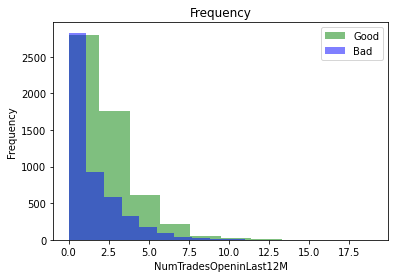

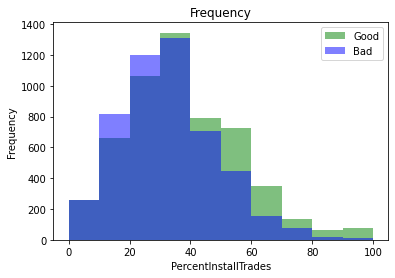

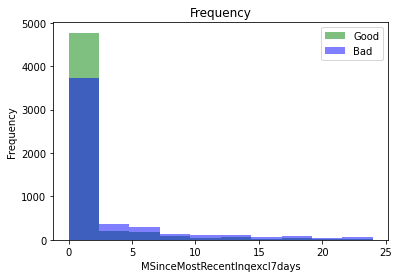

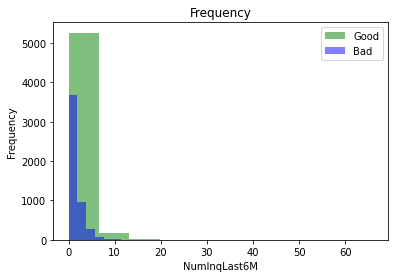

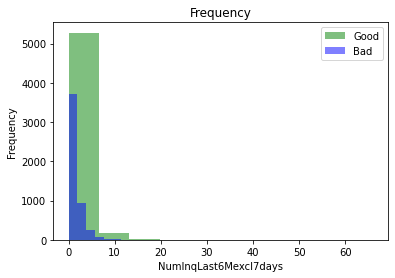

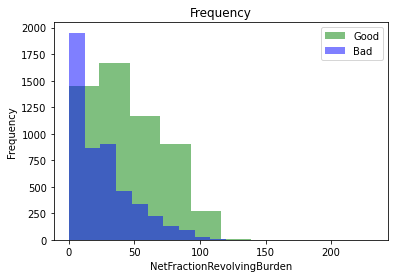

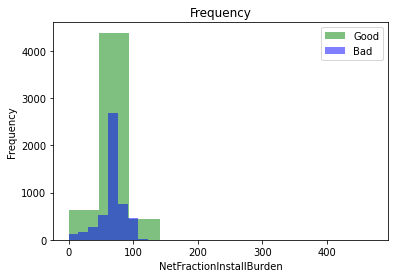

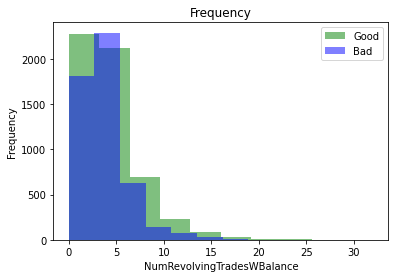

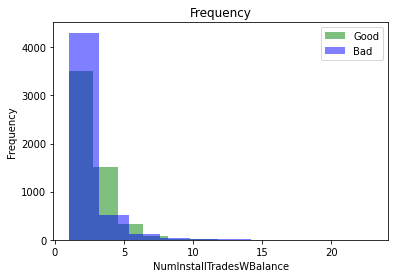

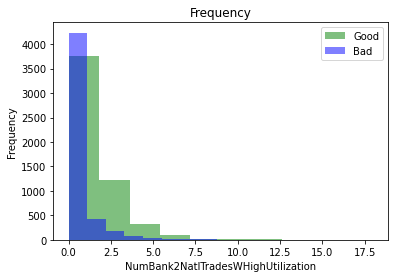

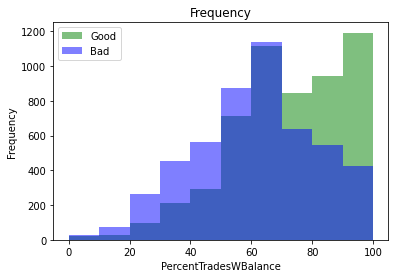

In [21]:
x1 = X_train_t.loc[Y_train==1, :]
x2 = X_train_t.loc[Y_train==0, :]

for i in range(23):
    fig1, ax1 = plt.subplots()
    
    ax1.hist(x1.iloc[:,i], alpha=0.5, color='g', label='Good')
    ax1.hist(x2.iloc[:,i], alpha=0.5, color='b', label='Bad')

    ax1.set(title='Frequency',xlabel= X_train.columns[i] ,ylabel='Frequency')
    ax1.legend()

In [22]:
df_total = X_train_t.iloc[:,:23]
df_total["Performance"] = Y_train
df_total.head()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,Performance
0,55,144,4,84,20,3,0,83,2,3,...,0,0,0,33,68,8,1,1,69,1
1,61,58,15,41,2,4,4,100,21,0,...,0,0,0,0,68,0,2,1,0,1
2,67,66,5,24,9,0,0,100,21,6,...,0,4,4,53,66,4,2,1,86,1
3,66,169,1,73,28,1,1,93,76,5,...,0,5,4,72,83,6,4,3,91,1
4,81,333,27,132,12,0,0,100,21,6,...,0,1,1,51,89,3,1,0,80,1


In [23]:
df_total.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,Performance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,72.056984,200.708290,9.555407,78.734391,21.114638,0.548714,0.363132,92.339707,21.423081,5.011473,...,2.344392,1.430347,1.374797,34.794244,68.331867,4.094847,2.417726,1.081939,66.422985,0.521943
std,9.585411,93.993862,12.594423,33.095015,10.998555,1.210884,0.968959,11.437425,14.437833,1.255876,...,4.047498,2.077896,2.038377,27.807656,19.561098,2.912275,1.526271,1.447982,21.387756,0.499542
min,33.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,65.000000,140.000000,3.000000,58.000000,13.000000,0.000000,0.000000,90.000000,16.000000,5.000000,...,0.000000,0.000000,0.000000,10.000000,67.000000,2.000000,1.000000,0.000000,50.000000,0.000000
50%,72.000000,194.000000,6.000000,78.000000,21.000000,0.000000,0.000000,96.000000,21.000000,5.000000,...,2.000000,1.000000,1.000000,33.000000,68.000000,4.000000,2.000000,1.000000,67.000000,1.000000
75%,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,21.000000,6.000000,...,2.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000,1.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,7.000000,...,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000,1.000000


Test correlation

In [24]:
df_total.corr()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,Performance
ExternalRiskEstimate,1.000000,0.248346,0.140532,0.329248,0.000182,-0.409436,-0.341908,0.514430,0.256682,0.543076,...,0.168159,-0.206102,-0.205150,-0.620626,-0.061118,-0.344280,-0.181980,-0.450582,-0.454538,-0.447120
MSinceOldestTradeOpen,0.248346,1.000000,0.102475,0.682920,0.241098,-0.012390,-0.027831,0.039060,0.015831,-0.007628,...,0.080914,-0.105119,-0.102075,-0.173952,-0.082527,0.110489,-0.030451,-0.004400,-0.214720,-0.207408
MSinceMostRecentTradeOpen,0.140532,0.102475,1.000000,0.403695,-0.250252,0.027930,0.028855,-0.116983,-0.031436,0.003297,...,0.066018,-0.165822,-0.167384,-0.054690,-0.122968,-0.157001,-0.153239,-0.074671,-0.006282,-0.045169
AverageMInFile,0.329248,0.682920,0.403695,1.000000,0.113141,0.039097,0.014473,-0.043825,0.012434,-0.014213,...,0.104950,-0.179285,-0.176923,-0.195169,-0.130732,0.008813,-0.120269,-0.048552,-0.207424,-0.237016
NumSatisfactoryTrades,0.000182,0.241098,-0.250252,0.113141,1.000000,-0.118150,-0.114178,0.263509,0.007394,-0.002089,...,0.015887,0.098253,0.098992,-0.073286,-0.011384,0.470375,0.351911,0.224554,-0.228353,-0.137121
NumTrades60Ever2DerogPubRec,-0.409436,-0.012390,0.027930,0.039097,-0.118150,1.000000,0.891417,-0.530663,-0.023114,-0.445421,...,-0.057584,0.044549,0.044011,0.090549,-0.004528,-0.047596,0.036148,-0.019156,0.112248,0.162438
NumTrades90Ever2DerogPubRec,-0.341908,-0.027831,0.028855,0.014473,-0.114178,0.891417,1.000000,-0.378933,0.013712,-0.401341,...,-0.052152,0.046473,0.046308,0.063181,0.002556,-0.059680,0.019234,-0.031228,0.096251,0.134661
PercentTradesNeverDelq,0.514430,0.039060,-0.116983,-0.043825,0.263509,-0.530663,-0.378933,1.000000,0.182443,0.486213,...,0.070339,0.006771,0.008167,-0.166271,0.028163,0.074777,0.046926,-0.002483,-0.180618,-0.250144
MSinceMostRecentDelq,0.256682,0.015831,-0.031436,0.012434,0.007394,-0.023114,0.013712,0.182443,1.000000,0.282088,...,0.024378,0.000927,0.001435,-0.041433,0.037218,-0.035858,-0.033466,-0.034440,-0.036094,-0.121106
MaxDelq2PublicRecLast12M,0.543076,-0.007628,0.003297,-0.014213,-0.002089,-0.445421,-0.401341,0.486213,0.282088,1.000000,...,0.054678,-0.023218,-0.024353,-0.117022,0.012480,-0.065867,-0.069846,-0.046316,-0.102008,-0.214547


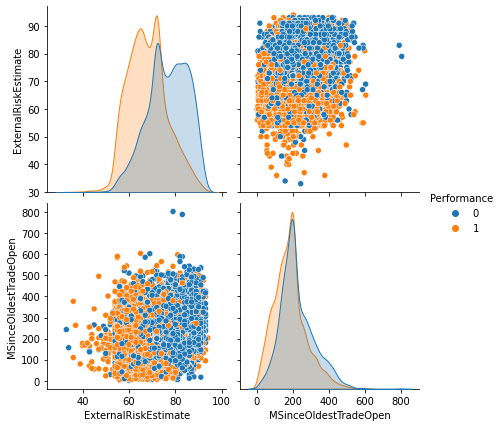

In [25]:
import seaborn as sns
cols=dict(zip(df_total.columns.values[:23],range(23)))
def corplot(i="ExternalRiskEstimate",j="MSinceOldestTradeOpen",num_input=False):
    if num_input : sns.pairplot(df_total.iloc[:,[i,j,-1]],hue ="Performance",height=3)
    else: sns.pairplot(df_total.iloc[:,[cols[i],cols[j],-1]],hue ="Performance",height=3)
corplot()

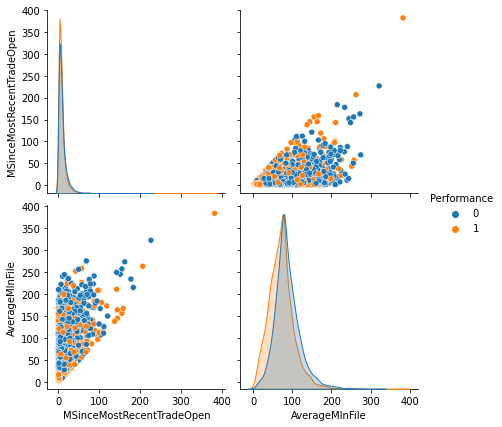

In [26]:
corplot(2,3,True)

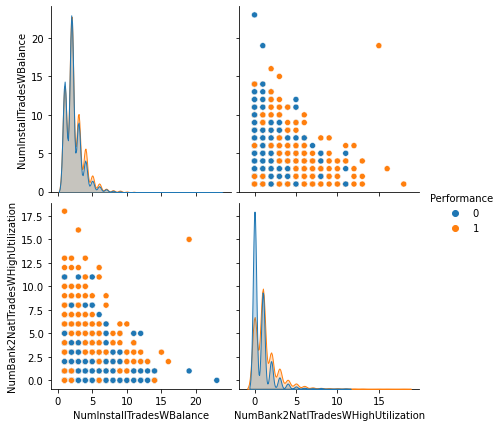

In [27]:
corplot(20,21,True)

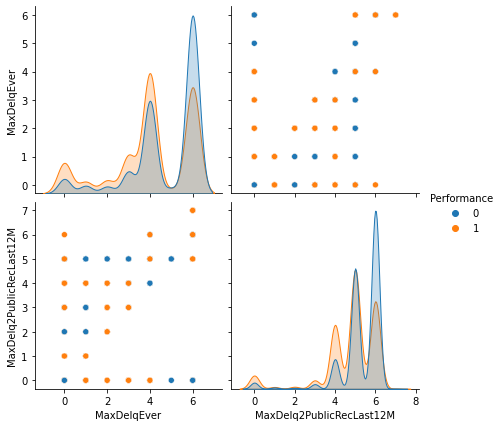

In [28]:
corplot(10,9,True)

## export data

In [29]:
df_train = X_train_t
df_train["RiskPerformance"]=Y_train

df_train.to_csv('df_cleaned.csv', index = 0)
